In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import json
import os

In [2]:
current_dir = os.getcwd()
monitor_date_time = 20050404140000

In [3]:
with open(current_dir + r"\Model_Performance_Monitoring\performance_date_time_asof_%s.json"%monitor_date_time, "r") as f:
    date_time = json.load(f)
with open(current_dir + r"\Model_Performance_Monitoring\performance_target_val_asof_%s.json"%monitor_date_time, "r") as f:
    target_val = json.load(f)
with open(current_dir + r"\Model_Performance_Monitoring\performance_baseline_predict_val_asof_%s.json"%monitor_date_time, "r") as f:
    baseline_predict_val = json.load(f)
with open(current_dir + r"\Model_Performance_Monitoring\performance_predict_val_asof_%s.json"%monitor_date_time, "r") as f:
    predict_val = json.load(f)
with open(current_dir + r"\Model_Performance_Monitoring\performance_actual_val_asof_%s.json"%monitor_date_time, "r") as f:
    actual_val = json.load(f)

In [4]:
dict_dataframe = {"date_time":date_time,
                  "target_value":target_val,
                  "baseline_predict_value":baseline_predict_val,
                  "predict_value":predict_val,
                  "actual_value":actual_val,
                  }

df_performance = pd.DataFrame(dict_dataframe)

display(df_performance.head(3))
print("Shape :", df_performance.shape)

,date_time,target_value,baseline_predict_value,predict_value,actual_value
0,2005-01-01T00:00:00.000000000,COGT,1.111310,1.148128,1.2
1,2005-01-01T00:00:00.000000000,C6H6GT,4.618541,4.816767,4.2
2,2005-01-01T00:00:00.000000000,NOxGT,171.434240,174.242500,165.0


Shape : (8988, 5)


In [5]:
df_pivot = df_performance.pivot(index ='date_time', columns = 'target_value', values = ['baseline_predict_value','predict_value','actual_value'])
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
df_pivot = df_pivot.reset_index()
df_pivot['date_time'] = pd.to_datetime(df_pivot['date_time'], errors='coerce')

display(df_pivot.head(3))
print("Shape :", df_pivot.shape)

,date_time,baseline_predict_value_C6H6GT,baseline_predict_value_COGT,baseline_predict_value_NO2GT,baseline_predict_value_NOxGT,predict_value_C6H6GT,predict_value_COGT,predict_value_NO2GT,predict_value_NOxGT,actual_value_C6H6GT,actual_value_COGT,actual_value_NO2GT,actual_value_NOxGT
0,2005-01-01 00:00:00,4.618541,1.111310,102.022081,171.434240,4.816767,1.148128,101.335758,174.242500,4.2,1.2,101.0,165.0
1,2005-01-01 01:00:00,9.124294,1.706983,117.153489,219.092169,8.877549,1.748880,115.486432,210.988618,8.8,1.6,106.0,215.0
2,2005-01-01 02:00:00,8.104488,2.014961,116.069101,297.610723,8.433233,2.051593,118.656131,292.840153,7.5,2.5,129.0,300.0


Shape : (2247, 13)


In [6]:
df_pivot.to_csv(r"Performance_on_test_dataset.csv", index=False)

## Compare Model Performance

In [7]:
list_target_var = ['COGT','C6H6GT','NOxGT','NO2GT']
for a_target in list_target_var:
    mae_baseline = mean_absolute_error(df_pivot['actual_value_%s'%a_target], df_pivot['baseline_predict_value_%s'%a_target])
    mae_challenger = mean_absolute_error(df_pivot['actual_value_%s'%a_target], df_pivot['predict_value_%s'%a_target])
    rmse_baseline = np.sqrt(mean_squared_error(df_pivot['actual_value_%s'%a_target], df_pivot['baseline_predict_value_%s'%a_target]))
    rmse_challenger = np.sqrt(mean_squared_error(df_pivot['actual_value_%s'%a_target], df_pivot['predict_value_%s'%a_target]))
    print("Target Variable:", a_target)
    print("MAE")
    print("- MAE Baseline     :", round(mae_baseline,4))
    print("- MAE Challenger   :", round(mae_challenger,4))
    print("RMSE")
    print("- RMSE Baseline    :", round(rmse_baseline,4))
    print("- RMSE Challenger  :", round(rmse_challenger,4))
    print("")

Target Variable: COGT
MAE
- MAE Baseline     : 0.2621
- MAE Challenger   : 0.2543
RMSE
- RMSE Baseline    : 0.3764
- RMSE Challenger  : 0.3592

Target Variable: C6H6GT
MAE
- MAE Baseline     : 0.5723
- MAE Challenger   : 0.5768
RMSE
- RMSE Baseline    : 0.9233
- RMSE Challenger  : 0.9318

Target Variable: NOxGT
MAE
- MAE Baseline     : 35.1226
- MAE Challenger   : 34.8479
RMSE
- RMSE Baseline    : 53.6169
- RMSE Challenger  : 54.0417

Target Variable: NO2GT
MAE
- MAE Baseline     : 9.7264
- MAE Challenger   : 10.4906
RMSE
- RMSE Baseline    : 13.4843
- RMSE Challenger  : 14.3561



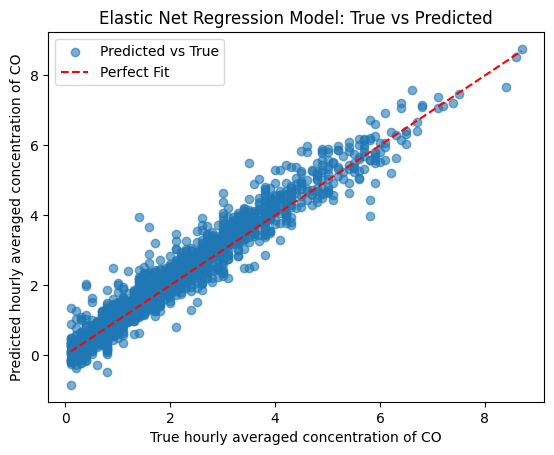

In [8]:
# Scatter plot: True vs Predicted
plt.scatter(df_pivot['actual_value_COGT'], df_pivot['predict_value_COGT'], alpha=0.6, label="Predicted vs True")
plt.plot([df_pivot['actual_value_COGT'].min(), df_pivot['actual_value_COGT'].max()], [df_pivot['actual_value_COGT'].min(), df_pivot['actual_value_COGT'].max()], 'r--', label="Perfect Fit")
plt.title("Elastic Net Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of CO")
plt.ylabel("Predicted hourly averaged concentration of CO")
plt.legend()
plt.show()

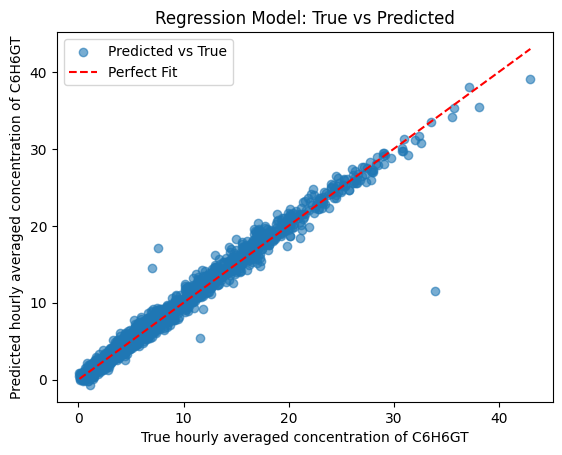

In [9]:
# Scatter plot: True vs Predicted
plt.scatter(df_pivot['actual_value_C6H6GT'], df_pivot['baseline_predict_value_C6H6GT'], alpha=0.6, label="Predicted vs True")
plt.plot([df_pivot['actual_value_C6H6GT'].min(), df_pivot['actual_value_C6H6GT'].max()], [df_pivot['actual_value_C6H6GT'].min(), df_pivot['actual_value_C6H6GT'].max()], 'r--', label="Perfect Fit")
plt.title("Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of C6H6GT")
plt.ylabel("Predicted hourly averaged concentration of C6H6GT")
plt.legend()
plt.show()

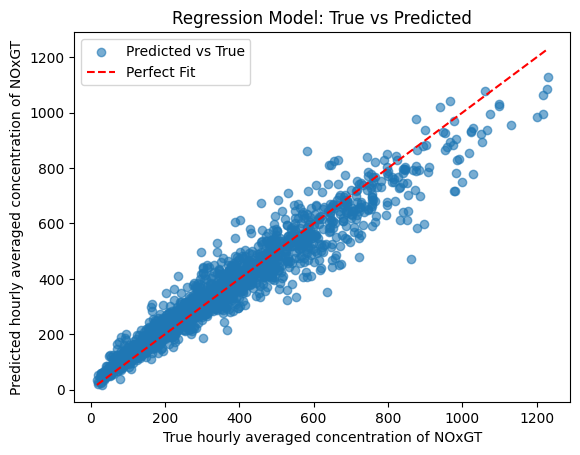

In [10]:
# Scatter plot: True vs Predicted
plt.scatter(df_pivot['actual_value_NOxGT'], df_pivot['baseline_predict_value_NOxGT'], alpha=0.6, label="Predicted vs True")
plt.plot([df_pivot['actual_value_NOxGT'].min(), df_pivot['actual_value_NOxGT'].max()], [df_pivot['actual_value_NOxGT'].min(), df_pivot['actual_value_NOxGT'].max()], 'r--', label="Perfect Fit")
plt.title("Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of NOxGT")
plt.ylabel("Predicted hourly averaged concentration of NOxGT")
plt.legend()
plt.show()

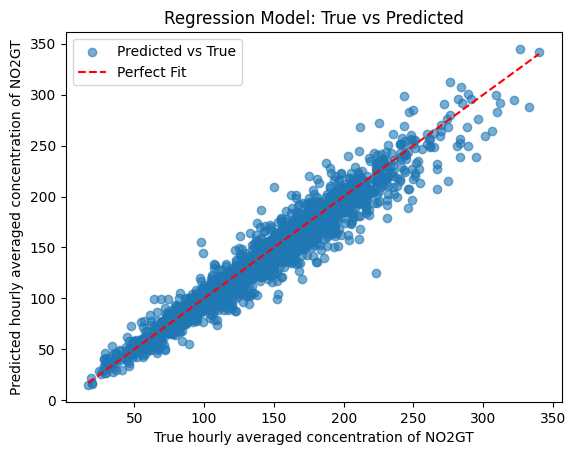

In [11]:
# Scatter plot: True vs Predicted
plt.scatter(df_pivot['actual_value_NO2GT'], df_pivot['baseline_predict_value_NO2GT'], alpha=0.6, label="Predicted vs True")
plt.plot([df_pivot['actual_value_NO2GT'].min(), df_pivot['actual_value_NO2GT'].max()], [df_pivot['actual_value_NO2GT'].min(), df_pivot['actual_value_NO2GT'].max()], 'r--', label="Perfect Fit")
plt.title("Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of NO2GT")
plt.ylabel("Predicted hourly averaged concentration of NO2GT")
plt.legend()
plt.show()